In [1]:
from functions import read_csv_file, make_np_array
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data, increment = read_csv_file("F_2_8_5b_NewFile4.csv")
ch1=make_np_array(data,0)*1000
ch2=make_np_array(data,1) *1000
ch3=make_np_array(data,2) *1000
times=make_np_array(data,3) *1000000

## Gaussian Process Regression

In [8]:
param_grid = {
    'alpha' : [1e-10, 1e-9, 1e-5, 0.001],
    'normalize_y' : [True, False],
    'optimizer' : ['fmin_l_bfgs_b', None],
}

In [9]:
def run_channel_gpr(x_data, y_data, name, param_grid):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)
    for data in [X_train, X_test, y_train, y_test]:
        data = data.reshape(-1,1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    gpr_reg = GaussianProcessRegressor()

    grid = GridSearchCV(gpr_reg, param_grid, n_jobs= -1, cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    plt.plot(X_test, y_test, ".")
    plt.plot(X_test, y_pred, ".")
    plt.title(f"{name} with best params from grid")
    plt.show()
    print(grid.best_params_)

    print(f"R2 SCORE: {round(r2_score(y_test, y_pred),2)}")
    print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_pred), 2)}")

### CH1

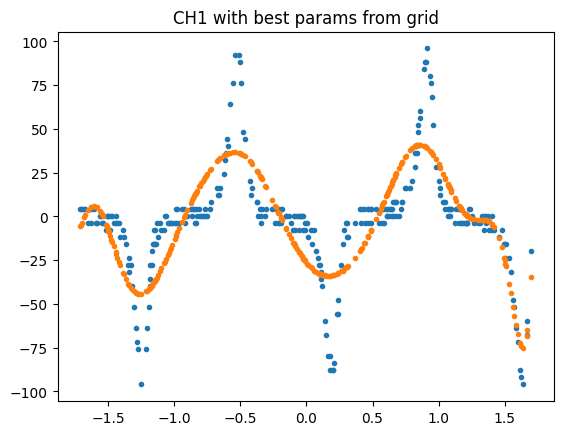

{'alpha': 1e-10, 'normalize_y': True, 'optimizer': 'fmin_l_bfgs_b'}
R2 SCORE: 0.64
Mean Squared Error: 355.37


In [10]:
run_channel_gpr(times, ch1, "CH1", param_grid)

### CH2

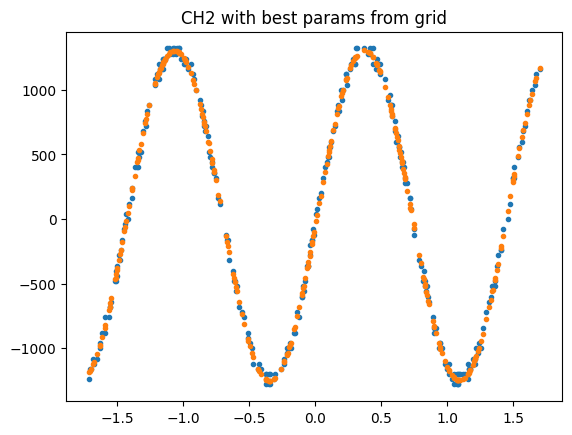

{'alpha': 1e-09, 'normalize_y': True, 'optimizer': 'fmin_l_bfgs_b'}
R2 SCORE: 1.0
Mean Squared Error: 1388.4


In [11]:
run_channel_gpr(times, ch2, "CH2", param_grid)

### CH3

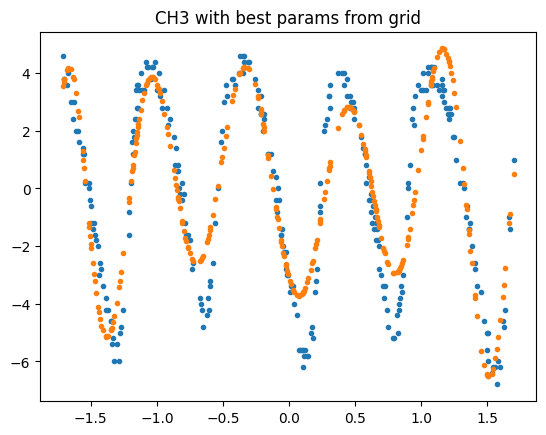

{'alpha': 1e-10, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b'}
R2 SCORE: 0.85
Mean Squared Error: 1.59


In [12]:
run_channel_gpr(times, ch3, "CH3", param_grid)

## Decision Trees

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
def run_channel_cart(x_data, y_data, name, param_grid):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)
    for data in [X_train, X_test, y_train, y_test]:
        data = data.reshape(-1,1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    cart_reg = DecisionTreeRegressor()

    grid = GridSearchCV(cart_reg, param_grid, n_jobs= -1, cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    plt.plot(X_test, y_test, ".")
    plt.plot(X_test, y_pred, ".")
    plt.title(f"{name} with best params from grid")
    plt.show()
    print(grid.best_params_)

    print(f"R2 SCORE: {round(r2_score(y_test, y_pred),2)}")
    print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_pred), 2)}")

In [26]:
param_grid = {
    'criterion' : ['squared_error', "friedman_mse", "absolute_error", "poisson"],
    'splitter' : ['best', 'random'],
    'max_depth' : [5,10,15],
    'min_samples_split' : [1,2,3,5]
}

### CH1

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.p

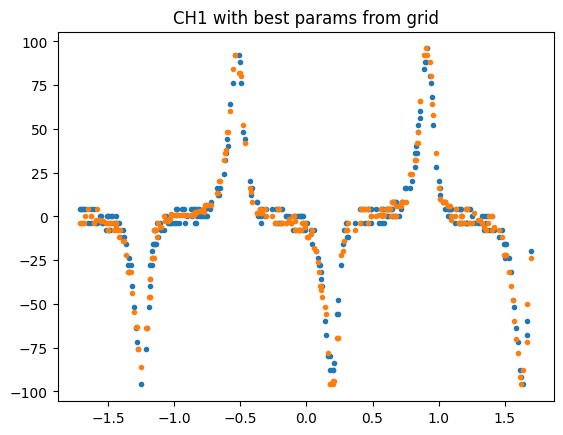

{'criterion': 'friedman_mse', 'max_depth': 15, 'min_samples_split': 3, 'splitter': 'random'}
R2 SCORE: 0.97
Mean Squared Error: 33.78


In [24]:
run_channel_cart(times, ch1, "CH1", param_grid)

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.p

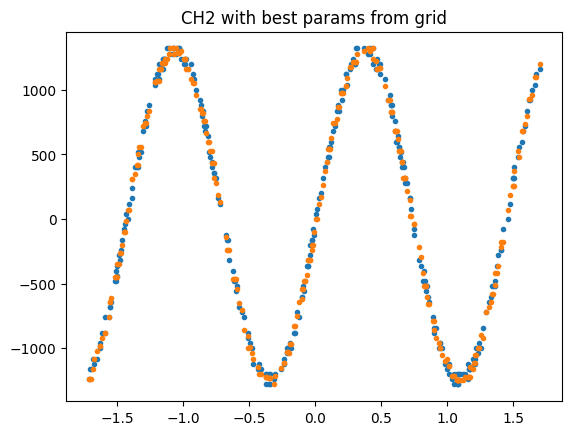

{'criterion': 'friedman_mse', 'max_depth': 15, 'min_samples_split': 5, 'splitter': 'best'}
R2 SCORE: 1.0
Mean Squared Error: 2794.41


In [27]:
run_channel_cart(times, ch2, "CH2", param_grid)

### CH3

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.p

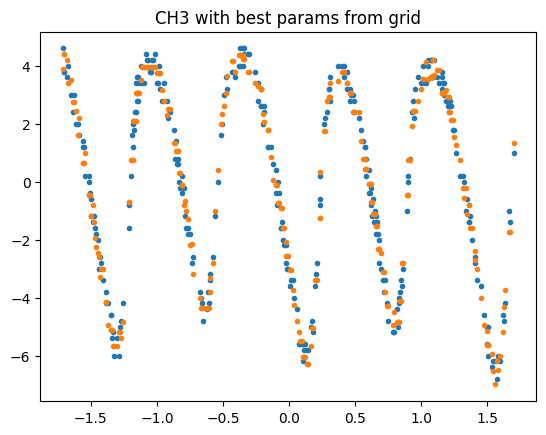

{'criterion': 'squared_error', 'max_depth': 15, 'min_samples_split': 5, 'splitter': 'best'}
R2 SCORE: 0.98
Mean Squared Error: 0.21


In [28]:
run_channel_cart(times, ch3, "CH3", param_grid)